## 1-2. 데이터를 준비하자!


### MNIST 숫자 손글씨 Dataset 불러들이기


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.4.1
11493376/11490434 [==============================] - 0s 0us/step
60000


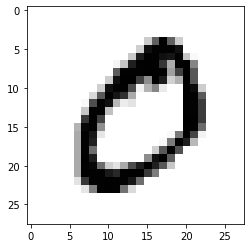

In [2]:
# 손글씨 하나 출력해보기

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

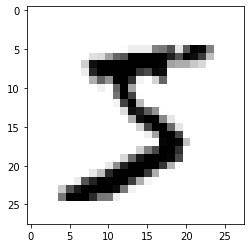

In [3]:
# DJ's practice
# 찾아보니까 X로 받는 array의 shape도 정해져 있구나...
# 또 cmap을 바꾸면 이미지 스타일(?)이 바뀐다.
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [4]:
# y_train[1] 실제 값 확인하기

print(y_train[1])

0


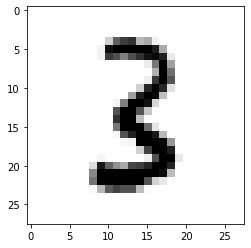

50001 번째 이미지의 숫자는 바로  3 입니다.


In [5]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=50000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

### 데이터 전처리 하기


In [6]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
# 3차원의 array에서 min, max를 뭘 기준으로 찾는 거지? 궁금해서 찾아보니까 np.max(), np.min()은 axis가 없으면 입력된 데이터를 flattened 해서 쓴단다.

최소값: 0  최대값: 255


In [7]:
# 궁금해서 0이 끝나고 양의 정수가 나오는 지점을 찾아봤음. 아마 여기서부터 이미지에 글씨가 쓰이기 시작한 듯
x_train[0][5:7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0]], dtype=uint8)

In [8]:
# 데이터 값이 0 ~ 255인 걸 0 ~ 1로 바꿔주기( / 255를 통해)

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [9]:
x_train_norm[0][5:7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
        0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
        0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.14117647,
        0.36862745, 0.60392157, 0.66666667, 0.99215686, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.88235294, 0.6745098 ,
        0.99215686, 0.94901961, 0.76470588, 0.25098039, 0.        ,
        0.        , 0.        , 0.        ]])

## 1-3. 딥러닝 네트워크 설계하기


### tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예
- 아래의 코드 8줄로도 손글씨 분류를 해낼 수 있다...

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [11]:
# .summary() 메소드로 모델 확인해보기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 1-4. 딥러닝 네트워크 학습시키기


In [12]:
# input데이터의 shape은 (28,28,1)로 설정했는데, 이건 (세로, 가로, 채널수)임.
# 근데 우리의 데이터에 채널수는 없으므로 데이터 shape이 (60000, 28, 28, 1)이 되게끔 바꿔주기
# 채널수가 1인 이유는 흑백이니까(컬러면 RGB여서 3)

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [13]:
# x_train 데이터로 딥러닝 학습시켜 보기
# 여기서 epoch 의미는 전체 60,000개의 데이터를 10번 반복해서 학습시키라는 뜻

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4446 - accuracy: 0.8662
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0620 - accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0439 - accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

## 1-5. 얼마나 잘 만들었는지 확인하기


### 테스트 데이터로 성능을 확인해 보자


In [14]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0364 - accuracy: 0.9900
test_loss: 0.03642014414072037 
test_accuracy: 0.9900000095367432


### 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자


#### `model.evaluate()` 대신 `model.predict()`를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있습니다.

In [15]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.6310803e-15 6.9094335e-12 3.2114450e-12 2.1904830e-12 1.9362244e-15
 3.1147502e-14 1.6898808e-23 1.0000000e+00 1.6479629e-12 1.5074761e-11]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


In [16]:
# predicted_result.shape을 보니까 (10000, 10)이란다.
# 아마도 10000개의 test데이터에 대한 숫자 클래스 10개의 확률값인 것 같다.

predicted_result

array([[1.6310803e-15, 6.9094335e-12, 3.2114450e-12, ..., 1.0000000e+00,
        1.6479629e-12, 1.5074761e-11],
       [1.1884024e-10, 6.8259870e-10, 1.0000000e+00, ..., 1.2798889e-14,
        1.2682369e-10, 5.2769665e-18],
       [4.8523474e-10, 9.9999607e-01, 1.5384878e-10, ..., 4.7656411e-07,
        1.6259483e-08, 2.1631757e-12],
       ...,
       [3.7171948e-15, 6.5791339e-12, 1.4769391e-17, ..., 2.9738818e-12,
        2.8242477e-08, 7.9793783e-11],
       [4.2292307e-09, 5.0832141e-13, 4.9532369e-18, ..., 6.3260920e-16,
        1.1371179e-07, 1.1619819e-13],
       [6.3770421e-12, 1.2565989e-11, 1.3452171e-13, ..., 6.4137246e-15,
        2.3031911e-10, 4.4924303e-18]], dtype=float32)

[1.6310803e-15 6.9094335e-12 3.2114450e-12 2.1904830e-12 1.9362244e-15
 3.1147502e-14 1.6898808e-23 1.0000000e+00 1.6479629e-12 1.5074761e-11]


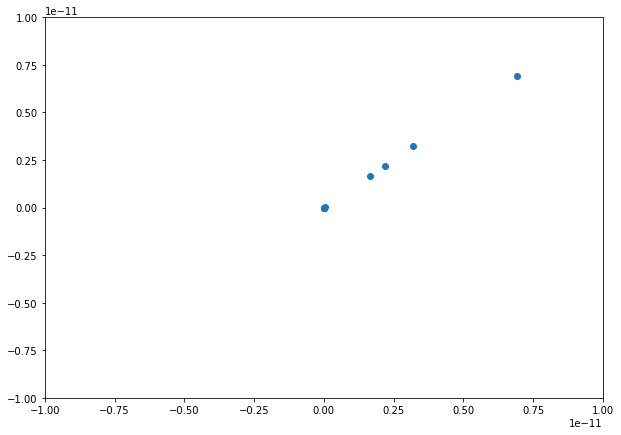

In [17]:
# predicted_result의 분포를 보고자 노력해봄...
# 값이 이렇게 작을 줄 몰랐음...

print(predicted_result[0])

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(predicted_result[0], predicted_result[0], marker='o')
ax.set_xlim(-0.00000000001, 0.00000000001)
ax.set_ylim(-0.00000000001,0.00000000001)
plt.show()


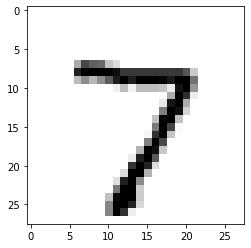

In [18]:
# 정말 추론한 0번째 값이 7이 맞는지 이미지로 확인

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

### 추론값과 실제값이 다른 경우 확인

예측확률분포: [4.1900109e-04 8.6910222e-03 1.3620760e-01 1.1088791e-03 2.9961009e-06
 4.3251145e-09 2.5091296e-10 7.8132415e-01 7.2151959e-02 9.4389681e-05]
라벨: 2, 예측결과: 7


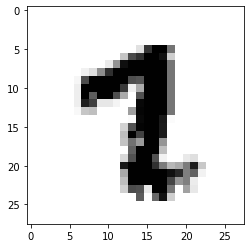

예측확률분포: [1.9463738e-14 2.2249131e-05 3.5744305e-10 3.6118007e-01 5.2662433e-08
 6.3879240e-01 1.0063609e-09 4.3255603e-12 5.1852603e-06 9.9293729e-08]
라벨: 3, 예측결과: 5


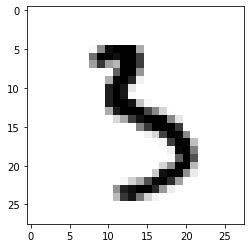

예측확률분포: [4.0135603e-07 6.6286554e-09 1.4336820e-08 3.3833576e-06 4.6352129e-06
 5.5405679e-05 1.5357940e-05 7.4821527e-09 6.0769694e-04 9.9931312e-01]
라벨: 8, 예측결과: 9


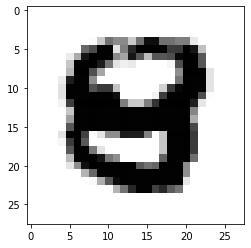

예측확률분포: [2.81836151e-07 1.47495475e-02 9.89684334e-10 6.55051569e-10
 4.90142703e-01 3.44586510e-07 7.14832984e-11 3.73397006e-06
 2.16199066e-02 4.73483413e-01]
라벨: 9, 예측결과: 4


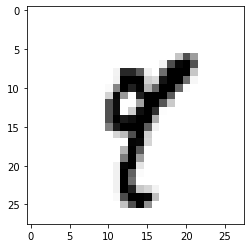

예측확률분포: [5.37092523e-11 1.36212215e-08 1.66353126e-10 3.01233395e-05
 2.00027084e-09 2.27928343e-10 1.18981757e-22 6.58612847e-01
 3.41355532e-01 1.50368828e-06]
라벨: 8, 예측결과: 7


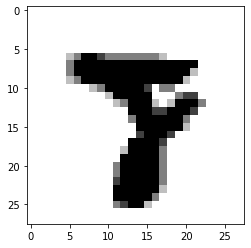

In [19]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 1-6. 더 좋은 네트워크 만들어 보기


#### 일단 딥러닝 구조는 안 바꾸고 하이퍼파라미터 바꿔보기
- Conv2D 레이어의 이미지 특징 수
- Dense 레이어의 뉴런 수
- epoch의 학습 반복 수 등...

In [20]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# 기존

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [21]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# n_dense = 64로 2배 바꿔 봄

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [22]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1 = 32로 2배 바꿔 봄

n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [23]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_2 = 64로 2배로 바꿔봄

n_channel_1=16
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                51232     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [24]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# n_train_epoch = 20으로 2배로 바꿔봄
# time도 넣어봄

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 시간 재기(시작)
import time
start = time.time()

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 시간 재기(끝)
end = time.time()

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))
print(f"time it took: {start-end}")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [25]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# 속도도 빠르고 accuracy도 좋았던 n_channel_2 바꾼 모델로 다시 해봄(계속 좋게 나오는지)
# n_channel_2 = 64로 2배로 바꿔봄
# time도 넣어봄

n_channel_1=16
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 시간 재기(시작)
import time
start = time.time()

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 시간 재기(끝)
end = time.time()

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))
print(f"time it took: {end-start}")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

## 결론
- n_channel_2를 2배 했을 때 속도 및 accuracy도 제일 좋은 듯
- 보니까 training 되는 param 수가 제일 많아지면 성능이 좋아지는 것 같은데, n_channel_2 늘릴 때 제일 많이 늘어남

# 1-7. 미니 프로젝트 : 가위바위보 분류기를 만들자


### 데이터 불러오기 + Resize 하기

- 모델의 인풋 array 사이즈가 (28,28)이었으니, 원래 (224,224)이던 가위바위보 샘플 이미지도 사이즈를 바꿔주기

In [26]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [27]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [28]:
# 바위 이미지도 바꿔보기
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [29]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


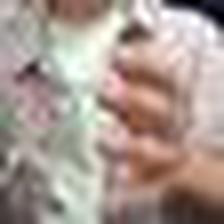

In [30]:
# DJ's practice
# 1) 임의의 사진 불러오기
# 2) 리사이징 해보기

test_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_existing"
images = glob.glob(test_path + "/*.jpg")

# image로 불러오기
old_img = Image.open(images[0])

# 사이즈 확인
# np.array(old_img) >>> (28,28,3) 벌써 resize 되어 있던 데이터

# 이미지 리사이징 해보기
new_img = old_img.resize((224, 224), Image.ANTIALIAS)
new_img.save('/aiffel/aiffel/rock_scissor_paper_existing/test_paper_resized', "JPEG")

# 이미지 리사이즈한 거 불러보기
Image.open(os.getenv("HOME") + "/aiffel/rock_scissor_paper_existing/test_paper_resized")

### load_data() 함수 정의해서 사용
- AIFFEL에서 제공됨

In [73]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


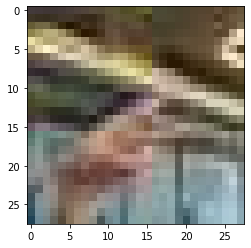

In [74]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계하기


In [75]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 1) 일단 input_shape이 달라진 것 같다.
# 2) 출력 시 클래스 수가 3개로 달라졌다.
# [[YOUR CODE]]

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 아까 하이퍼파라미터에서 여기 2배 해서 성능 좋았기에 64로 함
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_21 (Dense)             (None, 3)               

### 딥러닝 네트워크 학습시키기


In [76]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)
print("fit done")

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3877
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0412 - accuracy: 0.5099
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9886 - accuracy: 0.6601
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8773 - accuracy: 0.7955
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7422 - accuracy: 0.8459
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.9001
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.9321
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.9058
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9973
fit done


### 얼마나 잘 만들었는지 확인하기(테스트)


In [77]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

# 이미지 사이즈 확인
test_img_1 = Image.open(os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper_test/0.jpg")
np.array(test_img_1).shape
# >>> (224, 224, 3)

# load_data() 함수 지금 위치에 맞게 변경
def test_load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


# 이미지 리사이즈
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이즈
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor_test"
resize_images(image_dir_path)
print("가위 test resized!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이즈
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock_test"
resize_images(image_dir_path)
print("바위 test resized!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이즈
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper_test"
resize_images(image_dir_path)
print("보 test resized!")

# load_data()로 불러오기
test_set_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = test_load_data(test_set_path)
x_test_norm = x_test / 255.0

print("x_test_norm 개수는:", x_test_norm.shape)
print("y_test 개수는:", y_test.shape)

100  images to be resized.
100  images resized.
가위 test resized!
100  images to be resized.
100  images resized.
바위 test resized!
100  images to be resized.
100  images resized.
보 test resized!
테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test_norm 개수는: (300, 28, 28, 3)
y_test 개수는: (300,)


In [78]:
x_test_norm = x_test_norm.reshape(-1,28,28,3)

### 모델 평가해보기

In [79]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]


test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.7371 - accuracy: 0.3333
test_loss: 2.7370946407318115 
test_accuracy: 0.3333333432674408


### Accuracy 높이기 - 1) 모델 내에서 바꿔보기

In [80]:
# 1) 첫번째 Conv2D 이미지 특징 수 늘려보기(16 -> 32)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 아까 하이퍼파라미터에서 여기 2배 해서 성능 좋았기에 64로 함
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

### Accuracy 높이기 2) 학습 데이터 늘려보기

In [87]:
# 1) train이미지 가져오기(몇 개인지 확인)
# 2) resize하기
# 3) 가져와서 기존의 300개 train_set(x_train_norm)과 합치기

~/aiffel/rock_scissor_paper/train_2/rps/

paper01-000.png  paper02-090.png  paper04-060.png  paper06-030.png
paper01-001.png  paper02-091.png  paper04-061.png  paper06-031.png
paper01-002.png  paper02-092.png  paper04-062.png  paper06-032.png
paper01-003.png  paper02-093.png  paper04-063.png  paper06-033.png
paper01-004.png  paper02-094.png  paper04-064.png  paper06-034.png
paper01-005.png  paper02-095.png  paper04-065.png  paper06-035.png
paper01-006.png  paper02-096.png  paper04-066.png  paper06-036.png
paper01-007.png  paper02-097.png  paper04-067.png  paper06-037.png
paper01-008.png  paper02-098.png  paper04-068.png  paper06-038.png
paper01-009.png  paper02-099.png  paper04-069.png  paper06-039.png
paper01-010.png  paper02-100.png  paper04-070.png  paper06-040.png
paper01-011.png  paper02-101.png  paper04-071.png  paper06-041.png
paper01-012.png  paper02-102.png  paper04-072.png  paper06-042.png
paper01-013.png  paper02-103.png  paper04-073.png  paper06-043.png
paper01-014.png  paper02-104.png  paper04-074.png  paper06-044

In [89]:
# 원본 이미지 사이즈 확인
train_2_img = Image.open(os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps/paper/paper01-006.png")
np.array(train_2_img).shape


(300, 300, 4)

In [93]:
# png에 맞게 resize_images()함수 바꾸기
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png") # 이 부분 바꿈  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        old_img=old_img.convert('RGB')
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")


# 이미지 불러와서 resize하기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps/paper"
resize_images(image_dir_path)
print("----- 보 완료 -------")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps/scissors"
resize_images(image_dir_path)
print("----- 가위 완료 -------")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps/rock"
resize_images(image_dir_path)
print("----- 바위 완료 -------")

840  images to be resized.
840  images resized.
----- 보 완료 -------
0  images to be resized.
0  images resized.
----- 가위 완료 -------
840  images to be resized.
840  images resized.
----- 바위 완료 -------


In [94]:
# 오류 난 가위만 오류 바꿔서 다시 실행
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps/scissors"
resize_images(image_dir_path)
print("----- 가위 완료 -------")


840  images to be resized.
840  images resized.
----- 가위 완료 -------


In [95]:
# 리사이즈 됐는지 이미지 확인
train_resized = Image.open(os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps/paper/paper01-006.png")
print(np.array(train_resized).shape)
train_resized


(28, 28, 3)


In [98]:
# resize된 train 데이터 load하기

def train_2_load_data(img_path, number_of_data=2520):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("트레인 데이터(x_train_2)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

train_2_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps"
x_train_2, y_train_2 = train_2_load_data(train_2_path)

print("x_train_2 모습은:", x_train_2.shape)
print("y_train_2 모습은:", y_train_2.shape)


트레인 데이터(x_train_2)의 이미지 개수는 2520 입니다.
x_train_2 모습은: (2520, 28, 28, 3)
y_train_2 모습은: (2520,)


In [100]:
# normalize 해주기
x_train_2_norm = x_train_2 / 255.0
x_train_2_norm

array([[[[0.96470588, 1.        , 0.98431373],
         [0.96862745, 1.        , 0.98431373],
         [0.97647059, 1.        , 0.98431373],
         ...,
         [0.98039216, 0.98431373, 1.        ],
         [0.97647059, 0.98039216, 0.99607843],
         [0.97647059, 0.98039216, 0.98823529]],

        [[0.96862745, 1.        , 0.98431373],
         [0.96862745, 1.        , 0.98431373],
         [0.97647059, 1.        , 0.98431373],
         ...,
         [0.98039216, 0.98431373, 1.        ],
         [0.98039216, 0.98431373, 1.        ],
         [0.97647059, 0.98039216, 0.98823529]],

        [[0.96862745, 1.        , 0.98431373],
         [0.96862745, 1.        , 0.98431373],
         [0.97647059, 1.        , 0.99215686],
         ...,
         [0.98431373, 0.98823529, 1.        ],
         [0.98039216, 0.98431373, 1.        ],
         [0.98039216, 0.98431373, 0.99215686]],

        ...,

        [[0.96470588, 0.99607843, 1.        ],
         [0.97254902, 0.99215686, 1.        ]

In [102]:
# 기존 x_train_norm 300개와 합쳐주기
print("Before concatenate :", len(x_train_norm))

new_x_train = np.concatenate((x_train_norm, x_train_2_norm), axis=0)
new_y_train = np.concatenate((y_train, y_train_2))

print("After concatenate new_x_train:", len(new_x_train))
print("After concatenate new_y_train:", len(new_y_train))


Before concatenate : 300
After concatenate new_x_train: 2820
After concatenate new_y_train: 2820


In [103]:
# 모델 다시 만들어서 학습 및 평가해보기
# 하다 보니 생각났는데 이럴 필요는 없구나...

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 아까 하이퍼파라미터에서 여기 2배 해서 성능 좋았기에 64로 함
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(new_x_train, new_y_train, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

### Accuracy 높이기 - 3) 트레인셋 늘렸으니 다시 모델 하이퍼파라미터도 변경해보기

In [104]:
# 모델 다시 만들어서 학습 및 평가해보기
# 하다 보니 생각났는데 이럴 필요는 없구나...

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 아까 하이퍼파라미터에서 여기 2배 해서 성능 좋았기에 64로 함
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu')) # 여기 32 -> 64로 바꿈
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(new_x_train, new_y_train, epochs=30) # 속도 빠르니까 여기도 10 -> 30으로 바꿈

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_27 (Dense)             (None, 3)               

### Accuracy 높이기 - 4) overfitting이 나니까 모델 하이퍼파라미터 다시 튜닝하기...
- Epochs는 5 정도여도 되겠음..
- Dense 다시 낮추기

In [106]:

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 아까 하이퍼파라미터에서 여기 2배 해서 성능 좋았기에 64로 함
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu')) # 여기 32 -> 16으로 바꿈
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(new_x_train, new_y_train, epochs=5) # overfitting 때문에 10 -> 5로 바꿈

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                25616     
_________________________________________________________________
dense_31 (Dense)             (None, 3)               

In [112]:
# 하이퍼파라미터들 튜닝

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 32 -> 64로 변경
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu')) # 16 -> 12로 변경
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(new_x_train, new_y_train, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)                25616     
_________________________________________________________________
dense_43 (Dense)             (None, 3)               

### Accuracy 높이기 - 5) 트레인 데이터에서 내 손 사진 빼기
- 생각해보니까 그 300개가 성능을 낮추고 있나보다...

In [117]:
# 인터넷에서 받은 양질의 사진만 트레인 데이터로 넣기

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_2_norm, y_train_2, epochs=5)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_53 (Dense)             (None, 3)               

### Accuracy 높이기 - 6) 일반적인 손 사진 더 가져오기
- 내 손 사진 뺐다고 accuracy가 좋아지는 게 아니면 일반적인 사진을 더 가져와보자

In [118]:
# 데이터 리사이즈하기

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps_train3/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

# 바위 이미지
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps_train3/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 바위 이미지
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps_train3/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

699  images to be resized.
699  images resized.
가위 이미지 resize 완료!
699  images to be resized.
699  images resized.
바위 이미지 resize 완료!
699  images to be resized.
699  images resized.
보 이미지 resize 완료!


In [120]:
# resize된 train3 데이터 load하기

def train_3_load_data(img_path, number_of_data=2097):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("트레인 데이터(x_train_3)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

train_3_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_2/rps_train3"
x_train_3, y_train_3 = train_3_load_data(train_3_path)

print("x_train_2 모습은:", x_train_3.shape)
print("y_train_2 모습은:", y_train_3.shape)


트레인 데이터(x_train_3)의 이미지 개수는 2097 입니다.
x_train_2 모습은: (2097, 28, 28, 3)
y_train_2 모습은: (2097,)


In [123]:
# normalization

x_train_3_norm = x_train_3 / 255.0

In [124]:
# 기존 데이터와 합쳐서 4917개 데이터 만들기
print("Before concatenate :", len(new_x_train))

total_x_train = np.concatenate((new_x_train, x_train_3_norm), axis=0)
total_y_train = np.concatenate((new_y_train, y_train_3))

print("After concatenate new_x_train:", len(total_x_train))
print("After concatenate new_y_train:", len(total_y_train))


Before concatenate : 2820
After concatenate new_x_train: 4917
After concatenate new_y_train: 4917


In [125]:
# 제일 성능 좋았던(accuracy 0.56 나왔던...) 모델 가져와서 학습 및 평가하기

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 아까 하이퍼파라미터에서 여기 2배 해서 성능 좋았기에 64로 함
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu')) # 여기 32 -> 16으로 바꿈
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(total_x_train, total_y_train, epochs=5) # overfitting 때문에 10 -> 5로 바꿈

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 16)                25616     
_________________________________________________________________
dense_55 (Dense)             (None, 3)               

## 결론
- test 데이터가 일반적인 배경의 손사진이니 train 데이터도 일반적인 배경의 손사진이 많이 들어간 게 좋다.
- test 데이터에 대한 accuracy가 0.56 -> 0.99로 뛰었다.